<a href="https://colab.research.google.com/github/DengZhengyuan/CFB-filter-model/blob/main/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Flatten, Concatenate, concatenate, Dropout, Lambda
from keras.models import Model
from keras.layers.embeddings import Embedding
from tqdm import tqdm
%pip install shap
import shap

import pandas as pd
import numpy as np
import tensorflow as tf
print(tf.__version__)

# access to Google Drive
from google.colab import drive
drive.mount('/content/drive')


import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.8.2
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
path = '/content/drive/MyDrive/ML_model-2D_CoLab-0.63'
os.chdir(path)
os.getcwd()

'/content/drive/MyDrive/ML_model-2D_CoLab-0.63'

In [ ]:
column_names = ['sz', 
               'Es', 'dXEs', 'dYEs',
              #  'dXP', 'dYP',
               'Uslip', 'dXUslip', 'dYUslip',
               'Oz', 'dXOz', 'dYOz',
               'coefHr'
              ]

dir_dataset = './dataSet_Hr_27-40.csv';
raw_dataset = pd.read_csv(dir_dataset, names=column_names,
                          na_values = "?", comment='\t',
                          sep=",", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_labels = dataset.pop('coefHr')
test_labels = test_dataset.pop('coefHr')
print(test_dataset.shape)

(180692, 10)


In [ ]:
new_model = tf.keras.models.load_model('./saved_model/model_hr_27-40.h5')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                660       
                                                                 
 dense_1 (Dense)             (None, 50)                3050      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 30)                1530      
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [ ]:
def f(X):
    return new_model.predict(X).flatten()

## Single plot

In [ ]:
sample_test_data = test_dataset.iloc[50:100,:];
shap_test_data = dataset.iloc[110000:110500,:];

In [ ]:
explainer = shap.KernelExplainer(f, sample_test_data);
shap_values100 = explainer.shap_values(shap_test_data, nsamples=1000)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
exp = shap.Explanation(shap_values100, explainer.expected_value, data=shap_test_data)

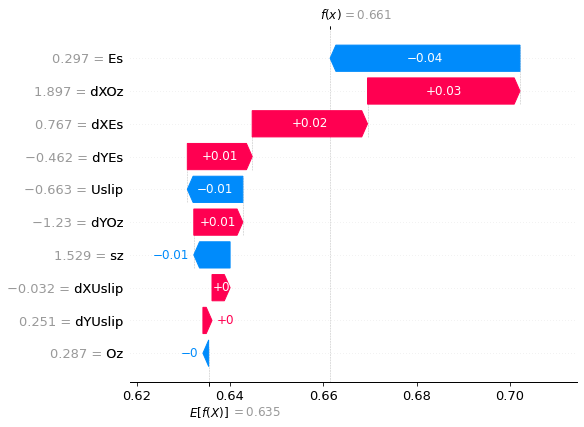

In [ ]:
shap.initjs()
num_idx = 41
shap.plots.waterfall(exp[num_idx], show=False)
# plt.savefig("./drive/MyDrive/ML_model-2D_CoLab-0.56/fig/waterfall.pdf")
plt.show()

In [ ]:
shap.initjs()
shap.force_plot(exp[num_idx])

In [ ]:
shap.initjs()
shap.force_plot(exp)

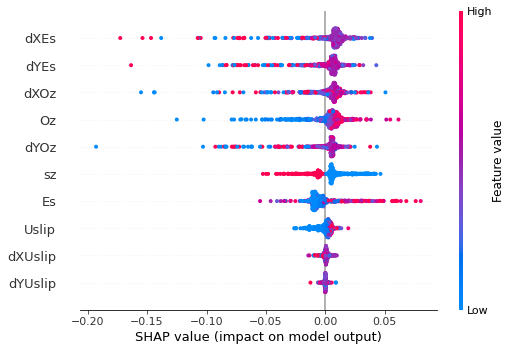

In [ ]:
shap.initjs()
shap.plots.beeswarm(exp, show=False)
plt.savefig("./fig/beeswarm.pdf")
plt.show()

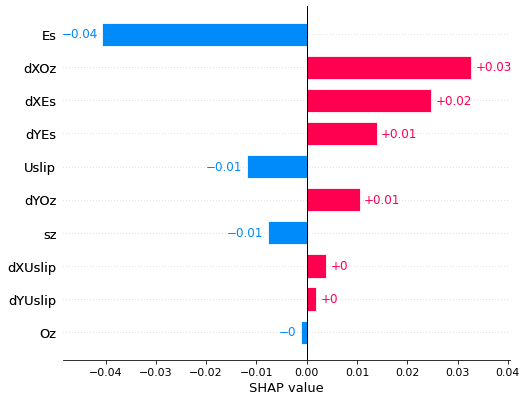

In [ ]:
shap.initjs()
shap.plots.bar(exp[num_idx])

In [ ]:
exp = shap.Explanation(shap_values100, explainer.expected_value, data=shap_test_data)

.values =
array([-6.51101520e-03, -8.41324033e-03,  1.06890293e-02,  8.26067035e-03,
       -4.84388956e-04,  9.08960862e-04, -9.82637816e-05,  4.62347065e-03,
        1.07119355e-02,  8.55844448e-03])

.base_values =
0.6354382288455965

.data =
sz         1.528974
Es        -0.716502
dXEs      -0.045334
dYEs      -0.017936
Uslip     -0.657154
dXUslip   -0.168969
dYUslip    0.037882
Oz        -0.208997
dXOz       0.329010
dYOz      -0.125604
Name: 110001, dtype: float64

In [ ]:
shap_pd = pd.DataFrame(shap_values100)
shap_pd.to_csv('./Post Process/shap_value-500.csv')
shap_test_data.to_csv('./Post Process/shap_test_data.csv')

In [ ]:
shap_test_data

,sz,Es,dXEs,dYEs,Uslip,dXUslip,dYUslip,Oz,dXOz,dYOz
110000,-0.654033,2.230123,2.736107,-0.805319,-0.545681,-2.941613,-0.027757,-1.039773,-2.376602,-0.086638
110001,1.528974,-0.716502,-0.045334,-0.017936,-0.657154,-0.168969,0.037882,-0.208997,0.329010,-0.125604
110002,-0.654033,-0.715363,0.015074,-0.005004,1.263047,1.653097,-0.327842,-0.678992,0.192317,0.199095
110003,-0.654033,-0.706568,-0.004984,-0.030418,-0.504958,-0.115452,0.177665,-0.896861,-0.036856,-0.065213
110004,1.528974,-0.571708,-0.714994,0.095689,-0.607248,0.063452,0.018755,-0.764156,0.874265,0.527804
...,...,...,...,...,...,...,...,...,...,...
110495,1.528974,-0.678188,0.021965,-0.082241,-0.284813,-0.037391,0.419209,0.587691,0.213702,-1.496836
110496,1.528974,-0.568233,-0.048530,0.001745,0.963290,0.471290,-1.576866,0.399903,0.184786,-0.282420
110497,1.528974,-0.608100,0.296014,0.043143,1.647547,-0.941246,1.017101,2.013912,-0.060169,0.125752
110498,-0.654033,0.444073,0.702179,-1.508827,-0.628061,-0.074709,0.438693,1.577318,-0.241023,-0.873123
